In [ ]:
##

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
##INCOME DATA

In [3]:
# specifying the path to csv files
income_1csv = Path("./Resources/Income/Australian Bureau of Statistics.csv")
income_2csv = Path("./Resources/Income/Australian Bureau of Statistics (1).csv")
income_3csv = Path("./Resources/Income/Australian Bureau of Statistics (2).csv")
income_4csv = Path("./Resources/Income/Australian Bureau of Statistics (3).csv")

income_1 = pd.read_csv(income_1csv)
income_2 = pd.read_csv(income_2csv)
income_3 = pd.read_csv(income_3csv)
income_4 = pd.read_csv(income_4csv)

#income_1.head()
new_header = income_2.iloc[0] #grab the first row for the header
income_2 = income_2[1:] #take the data less the header row
income_2.columns = new_header #set the header row as the df header
income_2.columns = income_2.columns.fillna('Unnamed: 0')

income_1.loc[2:2]
income_2_sub_df = income_2.loc[4:4][['Unnamed: 0','August 2023','August 2018']]
income_2_sub_df.columns = ['Unnamed: 0', '2023','2018']
income_3_sub_df = income_3.loc[2:2][['Unnamed: 0', 'August 2022', 'August 2021']]
income_4_sub_df = income_4.loc[2:2][['Unnamed: 0', 'August 2020', 'August 2019']]


concat_3_4_df = pd.concat([income_3_sub_df, income_4_sub_df], axis = 1)#.columns
concat_3_4_df.columns = ['Unnamed: 0', '2022','2021','to_be_removed','2020','2019']
concat_3_4_df = concat_3_4_df.drop(concat_3_4_df.columns[3], axis=1)


merged_df = pd.merge(income_2_sub_df, concat_3_4_df, on = 'Unnamed: 0')
merged_df = merged_df.transpose()
new_header = merged_df.iloc[0] #grab the first row for the header
merged_df = merged_df[1:] #take the data less the header row
merged_df.columns = new_header #set the header row as the df header
merged_df.reset_index(inplace = True)
merged_df.columns = ["Year", "Income Per Week"]

merged_df['Income Per Week'] = merged_df['Income Per Week'].str.replace("$","",regex=False)
merged_df['Income Per Week'] = merged_df['Income Per Week'].str.replace(",","",regex=False)
merged_df['Income Per Week'] = merged_df['Income Per Week'].astype(int)
merged_df['Year'] = merged_df['Year'].astype(int)
merged_df = merged_df.sort_values('Year')

merged_df['Income Per Annum'] = merged_df['Income Per Week'] * 52
merged_df['Income_Shift'] = merged_df['Income Per Annum'].shift(1)
merged_df['% Change per Year'] = round((merged_df['Income Per Annum'] /merged_df['Income_Shift']) * 100 - 100,2)
merged_df = merged_df.drop(columns=['Income_Shift'])
merged_df

,Year,Income Per Week,Income Per Annum,% Change per Year
1,2018,1075,55900,NaN
5,2019,1100,57200,2.33
4,2020,1150,59800,4.55
3,2021,1200,62400,4.35
2,2022,1250,65000,4.17
0,2023,1300,67600,4.00


In [ ]:
##FUEL DATA

In [ ]:
#creating file path
fuel_csv = Path("Resources/Dist Fuel Pricing 2019-2023.csv")
fuel_df = pd.read_csv(fuel_csv,skiprows=[0,1,2])

#clean data 
fuel_dropcol=fuel_df.drop(columns=['Unnamed: 4','Unnamed: 7','Unnamed: 12','Unnamed: 3','Unnamed: 13', 'Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18'])
fuel_dropnan=fuel_dropcol.dropna()

#CHANGING DATE FORMAT
fuel_dropnan['Unnamed: 0'] = fuel_dropnan['Unnamed: 0'].astype(str)
# Convert the date string to datetime object
fuel_dropnan['Unnamed: 0'] = fuel_dropnan['Unnamed: 0'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
# Extract the year from the datetime object
fuel_dropnan['Unnamed: 0''] = fuel_dropnan['Unnamed: 0'].apply(lambda x: x.strftime('%Y'))

In [ ]:
fuel_dropnan = fuel_dropnan.sort_values('Unnamed: 0'', ascending=True)

In [ ]:
#CHANGING COLUMN HEADERS 
fuel_column_change=fuel_dropnan.rename(columns={"Unnamed: 0": "Date", "Unnamed: 1": "Brent $","Unnamed: 2": "Brent Movement",
                                         "Unnamed: 5": "Exchange Rate","Unnamed: 6": "Exchange rate movement","Unnamed: 8": "Viva",
                                         "Unnamed: 9": "BP","Unnamed: 10": "Caltex","Unnamed: 11": "Mobil","Unnamed: 14": "Viva Movement"})
# Clean data
fuel_dropcol = fuel_df.drop(columns=['Unnamed: 4','Unnamed: 7','Unnamed: 12','Unnamed: 3','Unnamed: 13','Unnamed: 14', 'Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18'])
fuel_dropnan = fuel_dropcol.dropna()

# Changing date format
fuel_df['Unnamed: 0'] = pd.to_datetime(fuel_df['Unnamed: 0'], dayfirst=True)
fuel_df['year'] = fuel_df['Unnamed: 0'].dt.year
fuel_df['month'] = fuel_df['Unnamed: 0'].dt.month

# Changing column headers
fuel_column_change = fuel_dropnan.rename(columns={"Unnamed: 0": "Date", "Unnamed: 1": "Brent $","Unnamed: 2": "Brent Movement", "Unnamed: 5": "Exchange Rate","Unnamed: 6": "Exchange rate movement","Unnamed: 8": "Viva","Unnamed: 9": "BP","Unnamed: 10": "Caltex","Unnamed: 11": "Mobil"})
fuel_column_change 

In [ ]:
# fuel_date=fuel_df['Unnamed: 0'] = pd.to_datetime(fuel_df['Unnamed: 0'],dayfirst=True)
# fuel_df['year'] = fuel_df['Unnamed: 0'].dt.year
# fuel_month=fuel_df['month'] = fuel_df['Unnamed: 0'].dt.month


In [ ]:
type(fuel_column_change.year)

In [ ]:
#finding viva movement
viva_move=fuel_column_change['Viva Movement'] = fuel_column_change['Viva'].diff()

#caculating moving for each year
years = [2019,2020,2021, 2022, 2023]  # List of years
averages = []
for year in years:
    condition = fuel_column_change['year'] == year
    average = fuel_column_change.loc[condition, 'Viva Movement'].mean()
    averages.append({'Year': year, 'Average Viva Movement': average})

#putting data into data frame    
df_averages = pd.DataFrame(averages)
df_averages

In [ ]:

# Convert the 'Exchange Rate' column to numeric
fuel_column_change['Exchange rate movement'] = pd.to_numeric(fuel_column_change['Exchange rate movement'], errors='coerce')

# Group the exchange rate data by year
grouped_data = fuel_column_change.groupby('year')

# Calculate the average exchange rate for each year
average_exchange_rate = grouped_data['Exchange rate movement'].mean()
perc=average_exchange_rate*100

# Convert the grouped data to a DataFrame
df_average_exchange_rate = perc.reset_index()

# Print the DataFrame
df_average_exchange_rate

In [ ]:
incomevsexchange =pd.concat([df_average_exchange_rate, merged_df], axis=1)
incomevsexchange.sort_values(
     by=["year", "Year"])
incomevsexchange

In [ ]:
plt.bar(incomevsexchange['Year'], incomevsexchange['% Change per Year'], label='% Change per Year')
plt.bar(incomevsexchange['Year'], incomevsexchange['Exchange rate movement'], label='Exchange rate movement')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Bar Graph')
plt.legend()

# Show the plot
plt.show()

In [ ]:
incomevsfule =pd.concat([df_averages, merged_df], axis=1)
incomevsfule

In [ ]:
incomevsfule.plot(x='% Change per Year', y='Average Viva Movement', kind='line')
plt.xlabel('Income')
plt.ylabel('Fuel')
plt.title('Income vs Fuel')
plt.show()

In [ ]:
plt.plot(data_df['Date_cpi'], data_df['Value_cpi'], label='CPI')
plt.plot(data_df['Date_cpi'], data_df['Value_inflation'], label='Inflation')
plt.xlabel('Year')
plt.ylabel('Value %')
plt.title('Annual comparison between CPI and average inflation in Australia')
plt.legend()
plt.show()

In [4]:
##CPI AND INFLATION 


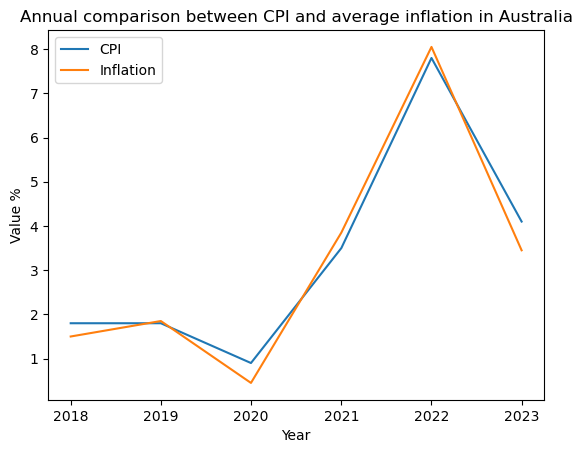

In [5]:
cpi_csv = Path("..\\project-1-draft\\Resources\\Inflation\\CPI Australia.csv")
inflation_csv = Path("..\\project-1-draft\\Resources\\Inflation\\Inflation Tradable & Non-tradable, annual movement.csv")
cpi_df = pd.read_csv(cpi_csv)
inflation_df = pd.read_csv(inflation_csv)



cpi_data = {'Date_cpi': ['2018', '2019', '2020', '2021', '2022', '2023'], 'Value_cpi': [1.8, 1.8, 0.9, 3.5, 7.8, 4.1]}
inflation_data = {'Date_inflation': ['2018', '2019', '2020', '2021', '2022', '2023'], 'Value_inflation': [1.5, 1.85, 0.45, 3.85, 8.05, 3.45]}


cpi_df = pd.DataFrame(cpi_data)
inflation_df = pd.DataFrame(inflation_data)


data_df = pd.merge(cpi_df, inflation_df, left_on='Date_cpi', right_on='Date_inflation')

data_df

data_df['Date_cpi'] = pd.to_datetime(data_df['Date_cpi'])

data_df = data_df.sort_values('Date_cpi')

plt.plot(data_df['Date_cpi'], data_df['Value_cpi'], label='CPI')
plt.plot(data_df['Date_cpi'], data_df['Value_inflation'], label='Inflation')
plt.xlabel('Year')
plt.ylabel('Value %')
plt.title('Annual comparison between CPI and average inflation in Australia')
plt.legend()
plt.show()

In [ ]:
inflationvsexchange =pd.concat([df_average_exchange_rate, inflation_df], axis=1)
inflationvsexchange

In [ ]:
plt.plot(inflationvsexchange['Value_inflation'],inflationvsexchange['Exchange rate movement'])
plt.show

In [ ]:
plt.bar(inflationvsexchange['year'], inflationvsexchange['Value_inflation'], label='Value_inflation')
plt.bar(inflationvsexchange['year'], inflationvsexchange['Exchange rate movement'], label='Exchange rate movement')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Bar Graph')
plt.legend()

# Show the plot
plt.show()

In [ ]:
plt.bar(inflationvsfule['Year'], inflationvsfule['Value_inflation'], label='Value_inflation')
plt.bar(inflationvsfule['Year'], inflationvsfule['Average Viva Movement'], label='Average Viva Movement')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Bar Graph')
plt.legend()

# Show the plot
plt.show()